In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

KeyError: 'contour_set_attributes'

In [6]:
!pip install flask

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
#load model 
model = tf.keras.models.load_model('models/object_detection.h5')

In [ ]:
path = 'test10.jpg'
image = load_img(path) #PIL object
image = np.array(image,dtype=np.uint8) #8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 #convert into array and get the normalized output



In [31]:
image.shape

(600, 800, 3)

In [32]:
#print size of the original image
h,w,d= image.shape
print("height of the image: ", h)
print("width of the image: ", w)

height of the image:  600
width of the image:  800


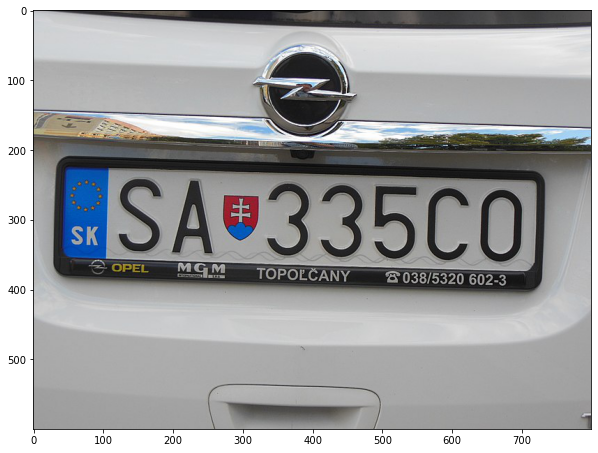

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [34]:
image_arr_224.shape

(224, 224, 3)

In [35]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [36]:
#make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 4s 4s/step


array([[0.23325051, 0.7709622 , 0.28816852, 0.5967215 ]], dtype=float32)

In [37]:
denorm = np.array([w,w,h,h])
denorm

array([800, 800, 600, 600])

In [38]:
#denormalize the values
denorm = np.array([w,w,h,h])
coords = coords* denorm
coords

array([[186.60041094, 616.76974297, 172.90111184, 358.03288221]])

In [39]:
coords = coords.astype(np.int32)
coords

array([[186, 616, 172, 358]])

(186, 172) (616, 358)


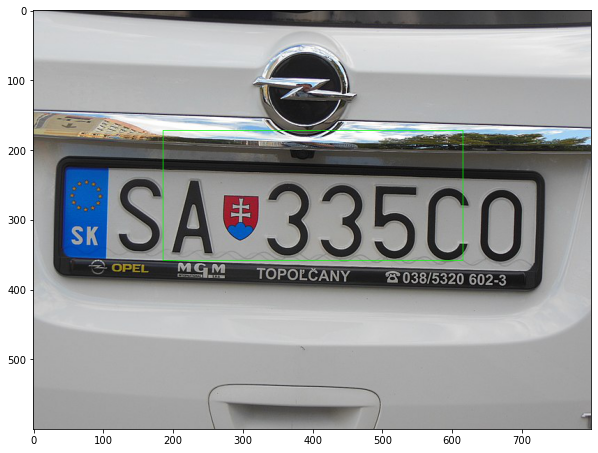

In [40]:
xmin,  xmax, ymin, ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),1)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [41]:

def object_detection(path):
    image = load_img(path) #PIL object
    image = np.array(image,dtype=np.uint8) #8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    image_arr_224 = img_to_array(image1)/255.0 #convert into array and get the normalized output
    #print size of the original image
    h,w,d= image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    test_arr.shape
    coords = model.predict(test_arr)
    denorm = np.array([w,w,h,h])
    coords = coords* denorm
    coords = coords.astype(np.int32)
    xmin,  xmax, ymin, ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),1)
    
    return image, coords

1/1 [==============================] - 0s 250ms/step
(209, 263) (759, 578)


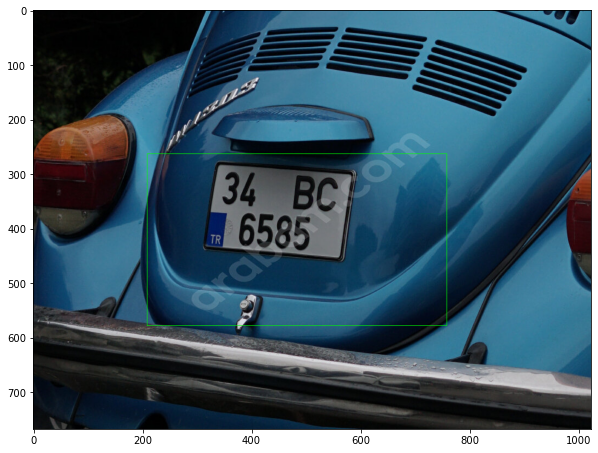

In [42]:
path = 'test8.webp'
image, coords = object_detection('test6.jpg')
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

**OPTICAL CHARACTER RECOGNITION OCR**

In [65]:
import pytesseract as pt

1/1 [==============================] - 0s 277ms/step
(204, 232) (424, 293)


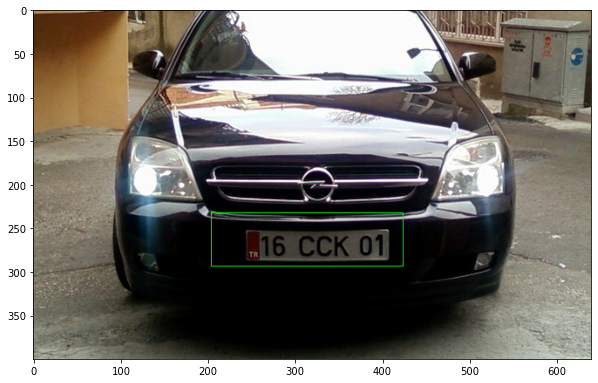

In [232]:
path = 'test4.jpg'
image, coords = object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [233]:
img = np.array(load_img(path))
xmin, xmax, ymin, ymax = coords[0]
roi = image[ymin:ymax,xmin:xmax]

In [234]:
from PIL import Image

In [235]:
roi.shape
resized_roi_array = cv2.resize(roi, (300, 100))

# Convert the resized array back to an Image
resized_roi = Image.fromarray(resized_roi_array)

In [236]:
type(roi)

numpy.ndarray

In [237]:
!pip install Flask

^C


In [238]:

gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = pt.image_to_string(invert, config ='--oem 3 --psm 6 -c tessedit_char_whitelist = 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
filter_data = "".join(data.split()).replace(":", "").replace("-", "").replace("’","").replace("“","").replace("'","") 
print(data)
print(filter_data)
cv2.imshow('invert',invert)
cv2.imshow('thresh',thresh)
cv2.waitKey()
cv2.destroyAllWindows()

In [239]:
def plate_number_detection(image)

SyntaxError: invalid syntax (1718364966.py, line 1)

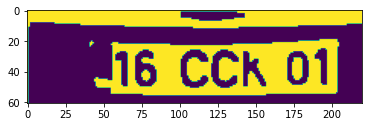

In [240]:
plt.imshow(invert)
plt.show()

In [1]:
text = pt.image_to_string(blur)
print(text)

NameError: name 'pt' is not defined